## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [3]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


We previously used this dataset for KNN regression. Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not useful to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

In [44]:
#answer below:
data = absent.drop(['Body mass index', 'ID', 'Disciplinary failure'], axis=1)
data = pd.get_dummies(data, columns=['Reason for absence', 'Education', 'Seasons', 'Day of the week'], drop_first=True)

melted['value'] = abs(melted['value'])
melted = melted[melted['value'] != 1]
print(melted.sort_values(by='value', ascending=False))

X = data.drop('Absenteeism time in hours', axis=1)
y = data['Absenteeism time in hours']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

                   variable     value
132                     Age  0.670979
115            Service time  0.670979
163              Hit target  0.460453
27         Month of absence  0.460453
276                  Weight  0.455975
..                      ...       ...
25         Month of absence  0.001520
150  Work load Average/day   0.000668
116            Service time  0.000668
270                  Weight  0.000269
15       Reason for absence  0.000269

[306 rows x 2 columns]


Scale the independent variables using the standard scaler

In [47]:
# answer below:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [60]:
# answer below:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
model = svr.fit(X_train_scaled, y_train)

svr_train_score = model.score(X_train_scaled, y_train)
svr_test_score = model.score(X_test_scaled, y_test)
print('SVR Train Score:', svr_train_score)
print('SVR Test Score:', svr_test_score)



SVR Train Score: 0.09900647894121295
SVR Test Score: 0.11728965887059706


If you are unhappy with your model's performance, perform a grid search to optimize C. You may also want to compare something other than R squared, like MSE, and could try some other kernels than just linear.

In [70]:
# answer below:
from sklearn.model_selection import GridSearchCV

params = {'C': [.01, .1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf']}
grid = GridSearchCV(SVR(), param_grid=params, cv=5, verbose=1)
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

Create a homoscedasticity (residual) plot. Look back at your KNN regression exercise (Day 32 Lecture 1). How do your model results compare?

In [71]:
grid.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Optimal SVR Train Score: 0.2051089412999343
Optimal SVR Test Score: 0.08203292890588254


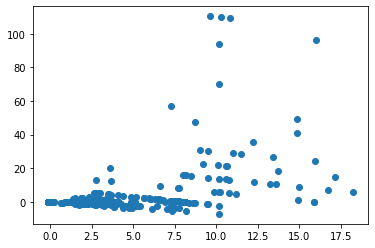

In [75]:
# answer below:
svr = SVR(C=10, kernel='rbf')
model = svr.fit(X_train_scaled, y_train)

svr_train_score = model.score(X_train_scaled, y_train)
svr_test_score = model.score(X_test_scaled, y_test)
print('Optimal SVR Train Score:', svr_train_score)
print('Optimal SVR Test Score:', svr_test_score)

pred_train = model.predict(X_train_scaled)
residuals = y_train - pred_train
plt.scatter(pred_train, residuals)
plt.show()


Looks similar to the heteroscadicity plot we made for the KNN regression, which makes sense as rbf can behave like KNN 